**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/var/folders/pj/9m4hjj3d1mq0s_821c7v7c740000gn/T/ipykernel_93603/1164468759.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


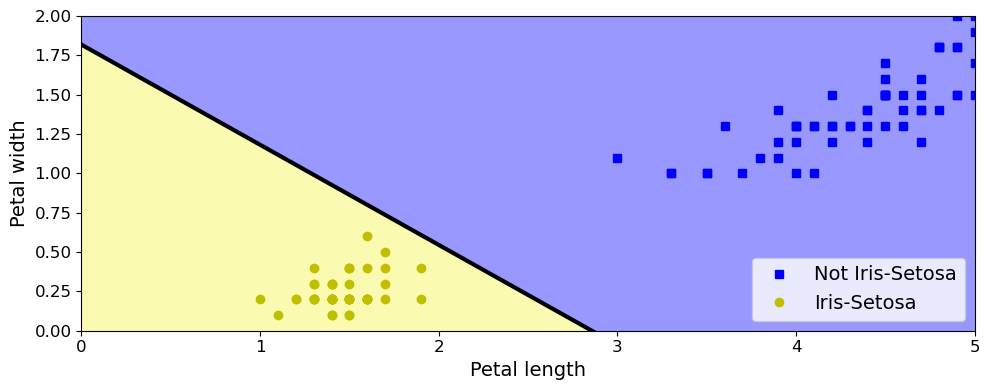

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


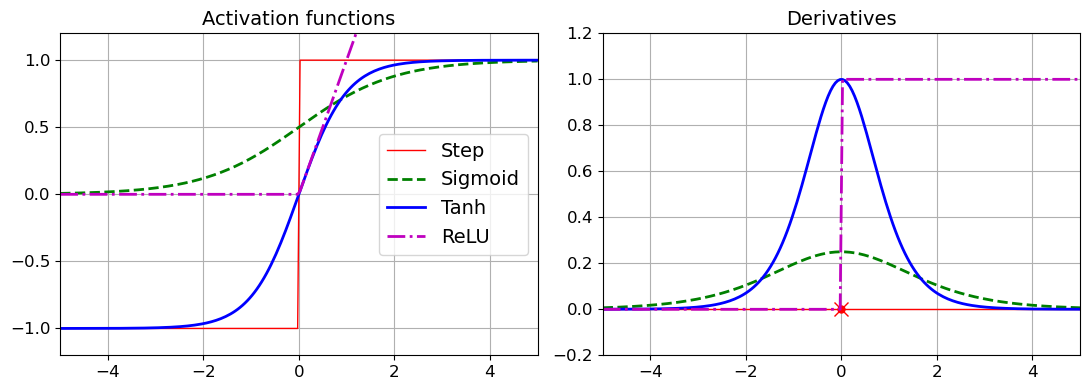

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

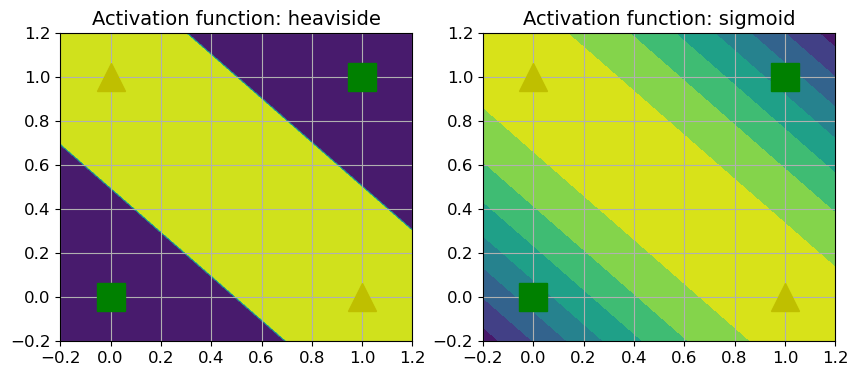

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.12.0'

In [11]:
keras.__version__

'2.12.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [13]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [14]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

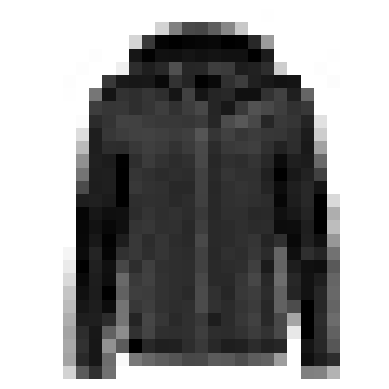

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [19]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


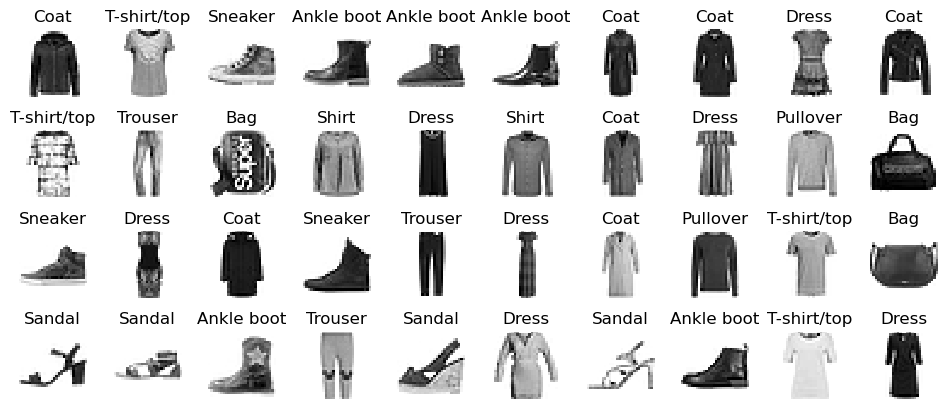

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.00974702, -0.05168516,  0.05665921, ...,  0.01749206,
        -0.00563101, -0.00029054],
       [-0.04994439, -0.05288085, -0.05401134, ...,  0.0578317 ,
        -0.05289955, -0.06170251],
       [-0.00947123,  0.05224746,  0.01395581, ...,  0.01513963,
         0.05433261, -0.01594622],
       ...,
       [ 0.01241091, -0.03778546, -0.06640029, ...,  0.0250417 ,
         0.02748475,  0.03717741],
       [ 0.0240578 , -0.00395089, -0.06215722, ...,  0.06627168,
         0.0560551 ,  0.01661077],
       [-0.01857937,  0.0152199 , -0.07194988, ...,  0.00724278,
        -0.01683807,  0.00093141]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
  64/1719 [>.............................] - ETA: 1s - loss: 1.8575 - accuracy: 0.3896  

2024-08-01 20:30:10.352908: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 1s 803us/step - loss: 0.7083 - accuracy: 0.7655 - val_loss: 0.5151 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 1s 709us/step - loss: 0.4840 - accuracy: 0.8308 - val_loss: 0.4302 - val_accuracy: 0.8554
Epoch 3/30
1719/1719 [==============================] - 1s 712us/step - loss: 0.4392 - accuracy: 0.8451 - val_loss: 0.5100 - val_accuracy: 0.8064
Epoch 4/30
1719/1719 [==============================] - 1s 708us/step - loss: 0.4134 - accuracy: 0.8561 - val_loss: 0.3899 - val_accuracy: 0.8686
Epoch 5/30
1719/1719 [==============================] - 1s 719us/step - loss: 0.3950 - accuracy: 0.8614 - val_loss: 0.3765 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 1s 697us/step - loss: 0.3761 - accuracy: 0.8673 - val_loss: 0.3697 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 1s 734us/step - loss: 0.3638 - accuracy: 0.8718 - val_loss: 0.3651 - val_accura

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


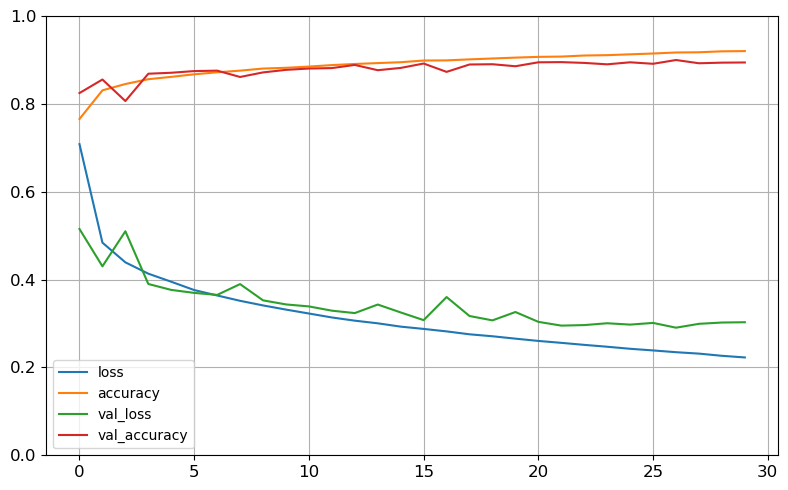

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 588us/step - loss: 0.3382 - accuracy: 0.8803


[0.33815670013427734, 0.880299985408783]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 30ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [44]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 7ms/step


array([9, 2, 1])

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


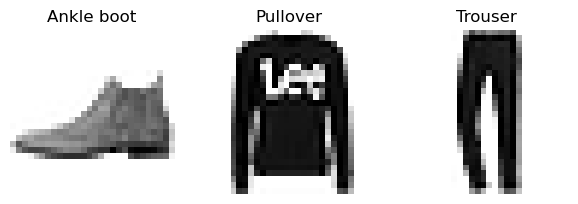

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 410us/step - loss: 1.8623 - val_loss: 1.7498
Epoch 2/20
363/363 [==============================] - 0s 300us/step - loss: 0.7262 - val_loss: 0.8189
Epoch 3/20
363/363 [==============================] - 0s 296us/step - loss: 0.6338 - val_loss: 0.6015
Epoch 4/20
363/363 [==============================] - 0s 293us/step - loss: 0.5927 - val_loss: 0.5665
Epoch 5/20
363/363 [==============================] - 0s 301us/step - loss: 0.5629 - val_loss: 0.5226
Epoch 6/20
363/363 [==============================] - 0s 294us/step - loss: 0.5357 - val_loss: 0.5057
Epoch 7/20
363/363 [==============================] - 0s 298us/step - loss: 0.5142 - val_loss: 0.4814
Epoch 8/20
363/363 [==============================] - 0s 299us/step - loss: 0.4956 - val_loss: 0.4652
Epoch 9/20
363/363 [==============================] - 0s 295us/step - loss: 0.4801 - val_loss: 0.4524
Epoch 10/20
363/363 [==============================] - 0s 290us/step - loss: 0.467

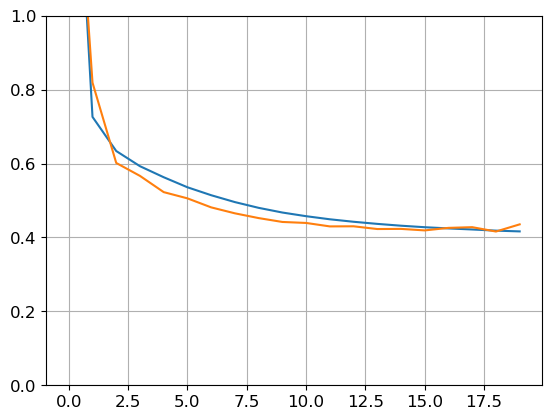

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
y_pred

array([[0.50116515],
       [1.7205828 ],
       [3.318912  ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 444us/step - loss: 1.9490 - val_loss: 4.0700
Epoch 2/20
363/363 [==============================] - 0s 337us/step - loss: 0.8182 - val_loss: 4.5347
Epoch 3/20
363/363 [==============================] - 0s 325us/step - loss: 0.7818 - val_loss: 1.5755
Epoch 4/20
363/363 [==============================] - 0s 315us/step - loss: 0.6851 - val_loss: 0.7315
Epoch 5/20
363/363 [==============================] - 0s 310us/step - loss: 0.6514 - val_loss: 0.7833
Epoch 6/20
363/363 [==============================] - 0s 313us/step - loss: 0.6162 - val_loss: 0.7164
Epoch 7/20
363/363 [==============================] - 0s 305us/step - loss: 0.5951 - val_loss: 0.5798
Epoch 8/20
363/363 [==============================] - 0s 310us/step - loss: 0.5734 - val_loss: 0.5725
Epoch 9/20
363/363 [==============================] - 0s 322us/step - loss: 0.5537 - val_loss: 0.5537
Epoch 10/20
363/363 [==============================] - 0s 308us/step - loss: 0.538

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 463us/step - loss: 2.3586 - val_loss: 1.1261
Epoch 2/20
363/363 [==============================] - 0s 350us/step - loss: 0.7134 - val_loss: 0.6770
Epoch 3/20
363/363 [==============================] - 0s 327us/step - loss: 0.6499 - val_loss: 0.6217
Epoch 4/20
363/363 [==============================] - 0s 327us/step - loss: 0.6162 - val_loss: 0.5813
Epoch 5/20
363/363 [==============================] - 0s 339us/step - loss: 0.5939 - val_loss: 0.5628
Epoch 6/20
363/363 [==============================] - 0s 343us/step - loss: 0.5696 - val_loss: 0.5339
Epoch 7/20
363/363 [==============================] - 0s 326us/step - loss: 0.5516 - val_loss: 0.5396
Epoch 8/20
363/363 [==============================] - 0s 331us/step - loss: 0.5331 - val_loss: 0.5168
Epoch 9/20
363/363 [==============================] - 0s 320us/step - loss: 0.5159 - val_loss: 0.4831
Epoch 10/20
363/363 [==============================] - 0s 321us/step - loss: 0.501

Adding an auxiliary output for regularization:

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [62]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 559us/step - loss: 2.5940 - main_output_loss: 2.3753 - aux_output_loss: 4.5621 - val_loss: 2.4281 - val_main_output_loss: 2.2675 - val_aux_output_loss: 3.8736
Epoch 2/20
363/363 [==============================] - 0s 388us/step - loss: 1.1467 - main_output_loss: 0.9449 - aux_output_loss: 2.9633 - val_loss: 1.2142 - val_main_output_loss: 0.9680 - val_aux_output_loss: 3.4299
Epoch 3/20
363/363 [==============================] - 0s 381us/step - loss: 0.9123 - main_output_loss: 0.7784 - aux_output_loss: 2.1173 - val_loss: 0.9615 - val_main_output_loss: 0.7041 - val_aux_output_loss: 3.2788
Epoch 4/20
363/363 [==============================] - 0s 381us/step - loss: 0.8067 - main_output_loss: 0.7066 - aux_output_loss: 1.7080 - val_loss: 0.8888 - val_main_output_loss: 0.6465 - val_aux_output_loss: 3.0696
Epoch 5/20
363/363 [==============================] - 0s 400us/step - loss: 0.7456 - main_output_loss: 0.6613 - aux_output_loss: 1.5047 

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 258us/step - loss: 0.4979 - main_output_loss: 0.4439 - aux_output_loss: 0.9845


1/1 [==============================] - 0s 22ms/step


# The subclassing API

In [65]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [66]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 582us/step - loss: 2.6098 - output_1_loss: 2.3587 - output_2_loss: 4.8696 - val_loss: 1.6805 - val_output_1_loss: 1.4861 - val_output_2_loss: 3.4309
Epoch 2/10
363/363 [==============================] - 0s 370us/step - loss: 1.0628 - output_1_loss: 0.8751 - output_2_loss: 2.7523 - val_loss: 0.9467 - val_output_1_loss: 0.8138 - val_output_2_loss: 2.1427
Epoch 3/10
363/363 [==============================] - 0s 370us/step - loss: 0.8262 - output_1_loss: 0.7053 - output_2_loss: 1.9138 - val_loss: 0.7614 - val_output_1_loss: 0.6605 - val_output_2_loss: 1.6700
Epoch 4/10
363/363 [==============================] - 0s 380us/step - loss: 0.7413 - output_1_loss: 0.6483 - output_2_loss: 1.5784 - val_loss: 0.7002 - val_output_1_loss: 0.6134 - val_output_2_loss: 1.4807
Epoch 5/10
363/363 [==============================] - 0s 372us/step - loss: 0.6973 - output_1_loss: 0.6165 - output_2_loss: 1.4239 - val_loss: 0.6572 - val_output_1_loss: 0.575

1/1 [==============================] - 0s 23ms/step


# Saving and Restoring

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [69]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 430us/step - loss: 2.1168 - val_loss: 1.6094
Epoch 2/10
363/363 [==============================] - 0s 313us/step - loss: 0.7861 - val_loss: 0.8127
Epoch 3/10
363/363 [==============================] - 0s 303us/step - loss: 0.6709 - val_loss: 0.6130
Epoch 4/10
363/363 [==============================] - 0s 305us/step - loss: 0.6221 - val_loss: 0.5841
Epoch 5/10
363/363 [==============================] - 0s 325us/step - loss: 0.5914 - val_loss: 0.5693
Epoch 6/10
363/363 [==============================] - 0s 322us/step - loss: 0.5668 - val_loss: 0.5505
Epoch 7/10
363/363 [==============================] - 0s 307us/step - loss: 0.5468 - val_loss: 0.5349
Epoch 8/10
363/363 [==============================] - 0s 306us/step - loss: 0.5293 - val_loss: 0.5143
Epoch 9/10
363/363 [==============================] - 0s 322us/step - loss: 0.5141 - val_loss: 0.4931
Epoch 10/10
162/162 [==============================] - 0s 204us/step - loss: 0.481

In [70]:
model.save("my_keras_model.h5")

In [71]:
model = keras.models.load_model("my_keras_model.h5")

In [72]:
model.predict(X_new)

1/1 [==============================] - 0s 17ms/step


array([[0.68875915],
       [1.4731556 ],
       [3.0589128 ]], dtype=float32)

In [73]:
model.save_weights("my_keras_weights.ckpt")

In [74]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [75]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 410us/step - loss: 0.4690 - val_loss: 0.4334
Epoch 2/10
363/363 [==============================] - 0s 317us/step - loss: 0.4563 - val_loss: 0.4316
Epoch 3/10
363/363 [==============================] - 0s 302us/step - loss: 0.4456 - val_loss: 0.4367
Epoch 4/10
363/363 [==============================] - 0s 315us/step - loss: 0.4344 - val_loss: 0.4585
Epoch 5/10
363/363 [==============================] - 0s 311us/step - loss: 0.4281 - val_loss: 0.4045
Epoch 6/10
363/363 [==============================] - 0s 301us/step - loss: 0.4196 - val_loss: 0.4547
Epoch 7/10
363/363 [==============================] - 0s 300us/step - loss: 0.4153 - val_loss: 0.4214
Epoch 8/10
363/363 [==============================] - 0s 323us/step - loss: 0.4098 - val_loss: 0.3807
Epoch 9/10
363/363 [==============================] - 0s 367us/step - loss: 0.4047 - val_loss: 0.4193
Epoch 10/10
162/162 [==============================] - 0s 215us/step - loss: 0.406

In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 429us/step - loss: 0.4050 - val_loss: 0.4010
Epoch 2/100
363/363 [==============================] - 0s 310us/step - loss: 0.4014 - val_loss: 0.4397
Epoch 3/100
363/363 [==============================] - 0s 301us/step - loss: 0.3983 - val_loss: 0.4265
Epoch 4/100
363/363 [==============================] - 0s 311us/step - loss: 0.3936 - val_loss: 0.4243
Epoch 5/100
363/363 [==============================] - 0s 321us/step - loss: 0.3920 - val_loss: 0.3772
Epoch 6/100
363/363 [==============================] - 0s 302us/step - loss: 0.3876 - val_loss: 0.4488
Epoch 7/100
363/363 [==============================] - 0s 300us/step - loss: 0.3863 - val_loss: 0.4125
Epoch 8/100
363/363 [==============================] - 0s 316us/step - loss: 0.3836 - val_loss: 0.3658
Epoch 9/100
363/363 [==============================] - 0s 303us/step - loss: 0.3807 - val_loss: 0.4271
Epoch 10/100
363/363 [==============================] - 0s 302us/step - l

In [80]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

206/363 [================>.............] - ETA: 0s - loss: 0.3655
val/train: 1.16
363/363 [==============================] - 0s 364us/step - loss: 0.3595 - val_loss: 0.4169


# TensorBoard

In [82]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [83]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_08_01-20_32_34'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 452us/step - loss: 1.2778 - val_loss: 1.0499
Epoch 2/30
363/363 [==============================] - 0s 329us/step - loss: 0.6775 - val_loss: 0.6213
Epoch 3/30
363/363 [==============================] - 0s 328us/step - loss: 0.6113 - val_loss: 0.5673
Epoch 4/30
363/363 [==============================] - 0s 324us/step - loss: 0.5670 - val_loss: 0.5298
Epoch 5/30
363/363 [==============================] - 0s 334us/step - loss: 0.5340 - val_loss: 0.5110
Epoch 6/30
363/363 [==============================] - 0s 325us/step - loss: 0.5073 - val_loss: 0.4715
Epoch 7/30
363/363 [==============================] - 0s 338us/step - loss: 0.4877 - val_loss: 0.4562
Epoch 8/30
363/363 [==============================] - 0s 326us/step - loss: 0.4723 - val_loss: 0.4603
Epoch 9/30
363/363 [==============================] - 0s 336us/step - loss: 0.4593 - val_loss: 0.4317
Epoch 10/30
363/363 [==============================] - 0s 330us/step - loss: 0.449

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [87]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [88]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2024_08_01-20_32_50'

In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.legacy.SGD(learning_rate=0.05))

In [93]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 445us/step - loss: 0.6442 - val_loss: 913.5782
Epoch 2/30
363/363 [==============================] - 0s 343us/step - loss: 0.5119 - val_loss: 0.3373
Epoch 3/30
363/363 [==============================] - 0s 328us/step - loss: 0.3731 - val_loss: 0.3206
Epoch 4/30
363/363 [==============================] - 0s 328us/step - loss: 0.3566 - val_loss: 0.3224
Epoch 5/30
363/363 [==============================] - 0s 330us/step - loss: 0.3511 - val_loss: 0.3185
Epoch 6/30
363/363 [==============================] - 0s 360us/step - loss: 0.3392 - val_loss: 0.3344
Epoch 7/30
363/363 [==============================] - 0s 341us/step - loss: 0.3283 - val_loss: 0.3127
Epoch 8/30
363/363 [==============================] - 0s 328us/step - loss: 0.3237 - val_loss: 0.2918
Epoch 9/30
363/363 [==============================] - 0s 330us/step - loss: 0.3175 - val_loss: 0.2933
Epoch 10/30
363/363 [==============================] - 0s 328us/step - loss: 0.3

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [94]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [95]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [97]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/pj/9m4hjj3d1mq0s_821c7v7c740000gn/T/ipykernel_93603/4087176523.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [98]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 411us/step - loss: 1.2186 - val_loss: 0.6483
Epoch 2/100
363/363 [==============================] - 0s 306us/step - loss: 0.6173 - val_loss: 0.7410
Epoch 3/100
363/363 [==============================] - 0s 301us/step - loss: 0.5425 - val_loss: 0.5440
Epoch 4/100
363/363 [==============================] - 0s 322us/step - loss: 0.4822 - val_loss: 0.4453
Epoch 5/100
363/363 [==============================] - 0s 300us/step - loss: 0.4527 - val_loss: 0.4573
Epoch 6/100
363/363 [==============================] - 0s 298us/step - loss: 0.4331 - val_loss: 0.4046
Epoch 7/100
363/363 [==============================] - 0s 300us/step - loss: 0.4233 - val_loss: 0.4030
Epoch 8/100
363/363 [==============================] - 0s 304us/step - loss: 0.4155 - val_loss: 0.3876
Epoch 9/100
363/363 [==============================] - 0s 302us/step - loss: 0.4102 - val_loss: 0.3821
Epoch 10/100
363/363 [==============================] - 0s 298us/step - l

In [99]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 212us/step - loss: 0.3751


In [100]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 16ms/step


In [101]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [103]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 524us/step - loss: 1.2509 - val_loss: 3.8756
Epoch 2/100
242/242 [==============================] - 0s 342us/step - loss: 0.6429 - val_loss: 24.0481
Epoch 3/100
242/242 [==============================] - 0s 346us/step - loss: 0.6801 - val_loss: 1.1184
Epoch 4/100
242/242 [==============================] - 0s 338us/step - loss: 0.4682 - val_loss: 0.4186
Epoch 5/100
242/242 [==============================] - 0s 347us/step - loss: 0.4333 - val_loss: 0.3937
Epoch 6/100
242/242 [==============================] - 0s 353us/step - loss: 0.4227 - val_loss: 0.3960
Epoch 7/100
242/242 [==============================] - 0s 346us/step - loss: 0.4179 - val_loss: 0.3957
Epoch 8/100
242/242 [==============================] - 0s 339us/step - loss: 0.4069 - val_loss: 0.3992
Epoch 9/100
242/242 [==============================] - 0s 338us/step - loss: 0.4004 - val_loss: 0.4072
Epoch 10/10

[CV] END learning_rate=0.008171782257177473, n_hidden=1, n_neurons=28; total time=   7.3s
Epoch 1/100
242/242 [==============================] - 0s 505us/step - loss: 0.9672 - val_loss: 1.2496
Epoch 2/100
242/242 [==============================] - 0s 337us/step - loss: 0.5288 - val_loss: 1.3404
Epoch 3/100
242/242 [==============================] - 0s 335us/step - loss: 0.4687 - val_loss: 0.7756
Epoch 4/100
242/242 [==============================] - 0s 339us/step - loss: 0.4398 - val_loss: 0.5213
Epoch 5/100
242/242 [==============================] - 0s 348us/step - loss: 0.4194 - val_loss: 0.3947
Epoch 6/100
242/242 [==============================] - 0s 342us/step - loss: 0.4076 - val_loss: 0.4007
Epoch 7/100
242/242 [==============================] - 0s 337us/step - loss: 0.4006 - val_loss: 0.5907
Epoch 8/100
242/242 [==============================] - 0s 349us/step - loss: 0.3945 - val_loss: 0.6852
Epoch 9/100
242/242 [==============================] - 0s 350us/step - loss: 0.3896 - 

[CV] END learning_rate=0.008171782257177473, n_hidden=1, n_neurons=28; total time=   1.4s
Epoch 1/100
242/242 [==============================] - 0s 496us/step - loss: 1.0747 - val_loss: 9.9071
Epoch 2/100
242/242 [==============================] - 0s 348us/step - loss: 0.5940 - val_loss: 8.4639
Epoch 3/100
242/242 [==============================] - 0s 333us/step - loss: 0.5434 - val_loss: 24.2085
Epoch 4/100
242/242 [==============================] - 0s 334us/step - loss: 0.8136 - val_loss: 8.2037
Epoch 5/100
242/242 [==============================] - 0s 341us/step - loss: 0.4844 - val_loss: 1.8202
Epoch 6/100
242/242 [==============================] - 0s 349us/step - loss: 0.4400 - val_loss: 0.4256
Epoch 7/100
242/242 [==============================] - 0s 349us/step - loss: 0.4185 - val_loss: 0.3941
Epoch 8/100
242/242 [==============================] - 0s 564us/step - loss: 0.4219 - val_loss: 0.3881
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4091 - v

[CV] END learning_rate=0.008171782257177473, n_hidden=1, n_neurons=28; total time=   8.2s
Epoch 1/100
242/242 [==============================] - 0s 539us/step - loss: 0.6173 - val_loss: 3.8468
Epoch 2/100
242/242 [==============================] - 0s 362us/step - loss: 0.4349 - val_loss: 0.7543
Epoch 3/100
242/242 [==============================] - 0s 357us/step - loss: 0.3857 - val_loss: 0.4785
Epoch 4/100
242/242 [==============================] - 0s 383us/step - loss: 0.3640 - val_loss: 0.3753
Epoch 5/100
242/242 [==============================] - 0s 360us/step - loss: 0.3550 - val_loss: 0.3619
Epoch 6/100
242/242 [==============================] - 0s 364us/step - loss: 0.3455 - val_loss: 0.3646
Epoch 7/100
242/242 [==============================] - 0s 359us/step - loss: 0.3444 - val_loss: 0.3560
Epoch 8/100
242/242 [==============================] - 0s 360us/step - loss: 0.3361 - val_loss: 0.4467
Epoch 9/100
242/242 [==============================] - 0s 356us/step - loss: 0.3315 - 

[CV] END learning_rate=0.020037703497088895, n_hidden=3, n_neurons=29; total time=   5.0s
Epoch 1/100
242/242 [==============================] - 0s 550us/step - loss: 0.7353 - val_loss: 0.8876
Epoch 2/100
242/242 [==============================] - 0s 364us/step - loss: 0.4447 - val_loss: 0.4175
Epoch 3/100
242/242 [==============================] - 0s 361us/step - loss: 0.3929 - val_loss: 0.4658
Epoch 4/100
242/242 [==============================] - 0s 360us/step - loss: 0.3767 - val_loss: 0.3567
Epoch 5/100
242/242 [==============================] - 0s 375us/step - loss: 0.3650 - val_loss: 0.3725
Epoch 6/100
242/242 [==============================] - 0s 372us/step - loss: 0.3574 - val_loss: 0.3537
Epoch 7/100
242/242 [==============================] - 0s 370us/step - loss: 0.3504 - val_loss: 0.3672
Epoch 8/100
242/242 [==============================] - 0s 367us/step - loss: 0.3494 - val_loss: 0.4072
Epoch 9/100
242/242 [==============================] - 0s 373us/step - loss: 0.3418 - 

[CV] END learning_rate=0.020037703497088895, n_hidden=3, n_neurons=29; total time=   3.8s
Epoch 1/100
242/242 [==============================] - 0s 570us/step - loss: 0.7868 - val_loss: 4.5779
Epoch 2/100
242/242 [==============================] - 0s 381us/step - loss: 0.4360 - val_loss: 2.0465
Epoch 3/100
242/242 [==============================] - 0s 373us/step - loss: 0.3971 - val_loss: 0.5922
Epoch 4/100
242/242 [==============================] - 0s 376us/step - loss: 0.3734 - val_loss: 0.3964
Epoch 5/100
242/242 [==============================] - 0s 380us/step - loss: 0.3627 - val_loss: 0.3457
Epoch 6/100
242/242 [==============================] - 0s 367us/step - loss: 0.3563 - val_loss: 0.3709
Epoch 7/100
242/242 [==============================] - 0s 365us/step - loss: 0.3496 - val_loss: 0.3562
Epoch 8/100
242/242 [==============================] - 0s 371us/step - loss: 0.3456 - val_loss: 0.3452
Epoch 9/100
242/242 [==============================] - 0s 384us/step - loss: 0.3397 - 

[CV] END learning_rate=0.020037703497088895, n_hidden=3, n_neurons=29; total time=   3.7s
Epoch 1/100
242/242 [==============================] - 0s 565us/step - loss: 0.6844 - val_loss: 1.9351
Epoch 2/100
242/242 [==============================] - 0s 395us/step - loss: 0.4322 - val_loss: 0.9593
Epoch 3/100
242/242 [==============================] - 0s 392us/step - loss: 0.4081 - val_loss: 6.0306
Epoch 4/100
242/242 [==============================] - 0s 407us/step - loss: 0.3695 - val_loss: 7.3462
Epoch 5/100
242/242 [==============================] - 0s 387us/step - loss: 0.4283 - val_loss: 3.2241
Epoch 6/100
242/242 [==============================] - 0s 386us/step - loss: 0.3832 - val_loss: 2.4368
Epoch 7/100
242/242 [==============================] - 0s 388us/step - loss: 0.3888 - val_loss: 6.4452
Epoch 8/100
242/242 [==============================] - 0s 392us/step - loss: 0.4038 - val_loss: 0.4281
Epoch 9/100
242/242 [==============================] - 0s 397us/step - loss: 0.3328 - 

KeyboardInterrupt: 

In [104]:
rnd_search_cv.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [105]:
rnd_search_cv.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [106]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [107]:
rnd_search_cv.score(X_test, y_test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [108]:
model = rnd_search_cv.best_estimator_.model
model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [109]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 229us/step - loss: 0.3021


0.3020971715450287

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [110]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [111]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [112]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [113]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

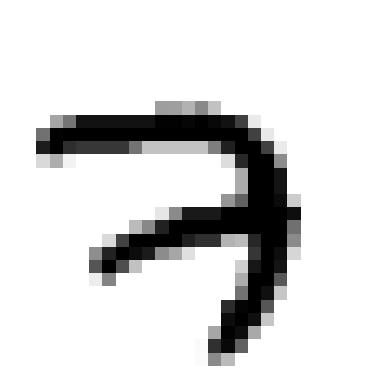

In [114]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [115]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [116]:
X_valid.shape

(5000, 28, 28)

In [117]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

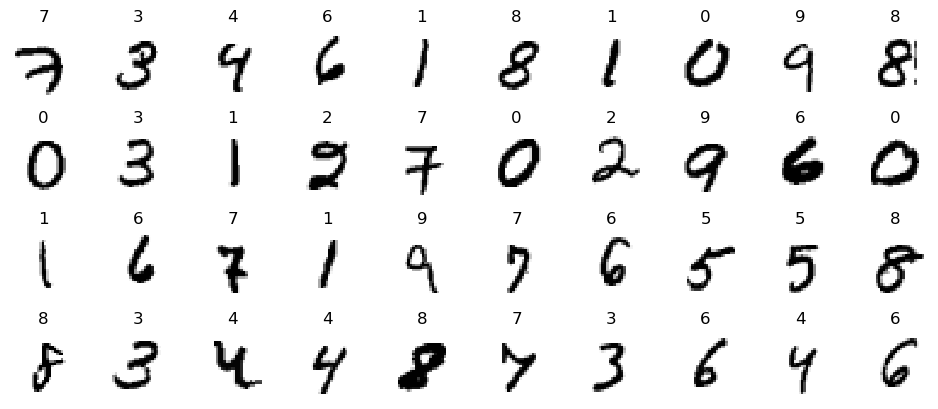

In [118]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [119]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [120]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [122]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [123]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 862us/step - loss: 599294791313784832.0000 - accuracy: 0.5968 - val_loss: 2.3911 - val_accuracy: 0.1126


We can now plot the loss as a function of the learning rate:

Text(0, 0.5, 'Loss')

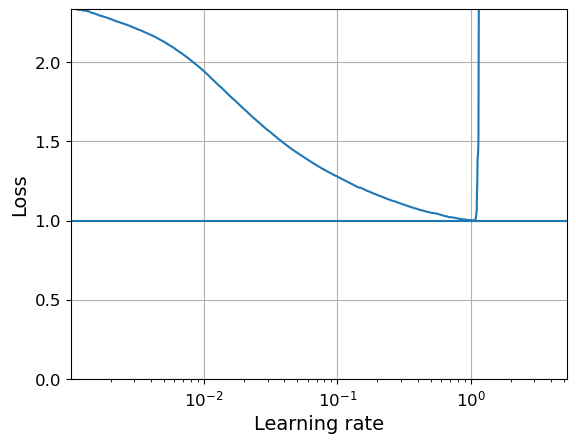

In [124]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [125]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [126]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [127]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [128]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [129]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 1s 781us/step - loss: 0.2323 - accuracy: 0.9278 - val_loss: 0.1154 - val_accuracy: 0.9646
Epoch 2/100
1719/1719 [==============================] - 1s 728us/step - loss: 0.0936 - accuracy: 0.9713 - val_loss: 0.0941 - val_accuracy: 0.9750
Epoch 3/100
1719/1719 [==============================] - 1s 734us/step - loss: 0.0656 - accuracy: 0.9789 - val_loss: 0.0729 - val_accuracy: 0.9774
Epoch 4/100
1719/1719 [==============================] - 1s 726us/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0712 - val_accuracy: 0.9806
Epoch 5/100
1719/1719 [==============================] - 1s 734us/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0779 - val_accuracy: 0.9792
Epoch 6/100
1719/1719 [==============================] - 1s 728us/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0775 - val_accuracy: 0.9796
Epoch 7/100
1719/1719 [==============================] - 1s 728us/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0

In [130]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 403us/step - loss: 0.0664 - accuracy: 0.9798


[0.06641758978366852, 0.9797999858856201]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [128]:
%tensorboard --logdir=./my_mnist_logs --port=6006